# PDEfind for dataset 3


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from aux_for_PDE_find import*

torch.manual_seed(0)
np.random.seed(0)

## Dataset preparation

In [2]:
path_train = "PDEfind_data/3.npz"
data_npz = np.load(path_train)

# Load the data from the .npz file
u = torch.from_numpy(data_npz['u']).type(torch.float32)  # u field
v = torch.from_numpy(data_npz['v']).type(torch.float32)  # v ield
x = torch.from_numpy(data_npz['x']).type(torch.float32)  # Spatial variable
y = torch.from_numpy(data_npz['y']).type(torch.float32)  # Spatial variable
t = torch.from_numpy(data_npz['t']).type(torch.float32)  # Temporal variable

print("u:", u.shape)
print("v:", v.shape)

u: torch.Size([256, 256, 201])
v: torch.Size([256, 256, 201])


# Build of $\Theta$

In [3]:
dt = t[0,0,1] - t[0,0,0]
dx = x[1,0,0] - x[0,0,0]
dy = y[0,1,0] - y[0,0,0]


# Compute time derivatives
dudt = compute_time_derivative(u, dt).reshape(-1, 1)
dvdt = compute_time_derivative(v, dt).reshape(-1, 1)

# Compute space derivatives on u
dudx = compute_space_derivative_x(u, dx, 1)
dudx_2 = compute_space_derivative_x(u, dx, 2)
dudx_3 = compute_space_derivative_x(u, dx, 3)
dudy = compute_space_derivative_y(u, dy, 1)
dudy_2 = compute_space_derivative_y(u, dy, 2)
dudy_3 = compute_space_derivative_y(u, dy, 3)

# Compute space derivatives on v
dvdx = compute_space_derivative_x(v, dx, 1)
dvdx_2 = compute_space_derivative_x(v, dx, 2)
dvdx_3 = compute_space_derivative_x(v, dx, 3)
dvdy = compute_space_derivative_y(v, dy, 1)
dvdy_2 = compute_space_derivative_y(v, dy, 2)
dvdy_3 = compute_space_derivative_y(v, dy, 3)

#compute other terms
u2 = torch.pow(u, 2)
v2 = torch.pow(v, 2)
u3 = torch.pow(u, 3)
v3 = torch.pow(v, 3)

#compute mixed terms for u and v
u_times_dudx = torch.mul(u,dudx)
u_times_dudy = torch.mul(u,dudy)
u_times_dvdx = torch.mul(u,dvdx)
u_times_dvdy = torch.mul(u,dvdy)

v_times_dudx = torch.mul(v,dudx)
v_times_dudy = torch.mul(v,dudy)
v_times_dvdx = torch.mul(v,dvdx)
v_times_dvdy = torch.mul(v,dvdy)

#cross product
u_times_v = torch.mul(u,v)
u_times_v2 = torch.mul(u,v2)
u2_times_v = torch.mul(u2,v)

#compute bias
bias = torch.ones_like(u)

u = u.reshape(-1, 1)                # 0
v = v.reshape(-1, 1)                # 1
dudx = dudx.reshape(-1, 1)          # 2
dudx_2 = dudx_2.reshape(-1, 1)      # 3
dudx_3 = dudx_3.reshape(-1, 1)      # 4
dudy = dudy.reshape(-1, 1)          # 5
dudy_2 = dudy_2.reshape(-1, 1)      # 6
dudy_3 = dudy_3.reshape(-1, 1)      # 7
dvdx = dvdx.reshape(-1, 1)          # 8
dvdx_2 = dvdx_2.reshape(-1, 1)      # 9
dvdx_3 = dvdx_3.reshape(-1, 1)      # 10
dvdy = dvdy.reshape(-1, 1)          # 11
dvdy_2 = dvdy_2.reshape(-1, 1)      # 12
dvdy_3 = dvdy_3.reshape(-1, 1)      # 13
u2 = u2.reshape(-1, 1)              # 14
v2 = v2.reshape(-1, 1)              # 15
u3 = u3.reshape(-1, 1)              # 16
v3 = v3.reshape(-1, 1)              # 17
u_times_dudx = u_times_dudx.reshape(-1, 1)  # 18
u_times_dudy = u_times_dudy.reshape(-1, 1)  # 19
u_times_dvdx = u_times_dvdx.reshape(-1, 1)  # 20
u_times_dvdy = u_times_dvdy.reshape(-1, 1)  # 21
v_times_dudx = v_times_dudx.reshape(-1, 1)  # 22
v_times_dudy = v_times_dudy.reshape(-1, 1)  # 23
v_times_dvdx = v_times_dvdx.reshape(-1, 1)  # 24
v_times_dvdy = v_times_dvdy.reshape(-1, 1)  # 25
u_times_v = u_times_v.reshape(-1, 1)        # 26
u_times_v2 = u_times_v2.reshape(-1, 1)      # 27
u2_times_v = u2_times_v.reshape(-1, 1)      # 28
bias = bias.reshape(-1, 1)                  # 29



Theta = torch.cat([
    u,                # 0
    v,                # 1
    dudx,             # 2
    dudx_2,           # 3
    dudx_3,           # 4
    dudy,             # 5
    dudy_2,           # 6
    dudy_3,           # 7
    dvdx,             # 8
    dvdx_2,           # 9
    dvdx_3,           # 10
    dvdy,             # 11
    dvdy_2,           # 12
    dvdy_3,           # 13
    u2,               # 14
    v2,               # 15
    u3,               # 16
    v3,               # 17
    u_times_dudx,     # 18
    u_times_dudy,     # 19
    u_times_dvdx,     # 20
    u_times_dvdy,     # 21
    v_times_dudx,     # 22
    v_times_dudy,     # 23
    v_times_dvdx,     # 24
    v_times_dvdy,     # 25
    u_times_v,        # 26
    u_times_v2,       # 27
    u2_times_v,       # 28
    bias              # 29
], dim=1)

Theta_names = [
    "u",                # 0
    "v",                # 1
    "dudx",             # 2
    "dudx_2",           # 3
    "dudx_3",           # 4
    "dudy",             # 5
    "dudy_2",           # 6
    "dudy_3",           # 7
    "dvdx",             # 8
    "dvdx_2",           # 9
    "dvdx_3",           # 10
    "dvdy",             # 11
    "dvdy_2",           # 12
    "dvdy_3",           # 13
    "u2",               # 14
    "v2",               # 15
    "u3",               # 16
    "v3",               # 17
    "u_times_dudx",     # 18
    "u_times_dudy",     # 19
    "u_times_dvdx",     # 20
    "u_times_dvdy",     # 21
    "v_times_dudx",     # 22
    "v_times_dudy",     # 23
    "v_times_dvdx",     # 24
    "v_times_dvdy",     # 25
    "u_times_v",        # 26
    "u_times_v2",       # 27
    "u2_times_v",       # 28
    "bias"              # 29
]


## Regression and printing of the PDE for u

In [4]:
np.random.seed(5)
sample_size = int(1e5)
random_indexes = np.random.choice(Theta.shape[0], sample_size, replace=False)
alpha=[0.1, 0.1, 0.0]
threshold=4
selected_names, regression_coef_ = myregression2(Theta[random_indexes],dudt[random_indexes],Theta_names,threshold=threshold,alpha=alpha,test_size=0.2)

Regression # 1
u  c=  0.9983542158032774
v  c=  0.3063282740248729
dudx_2  c=  0.09155398515690955
dudy_2  c=  0.10036397958660069
u3  c=  -1.0019631389027372
v3  c=  0.6603596153770965
u_times_v2  c=  -1.0033626696610678
u2_times_v  c=  0.6610966695988226
Mean Squared Error: 0.008062390908424028
###################### end of regression 1 ##############################

Regression # 2
u  c=  0.9465298956302507
v  c=  0.20286670369970025
dudx_2  c=  0.09468144916832406
dudy_2  c=  0.09904721600457228
u3  c=  -0.9436419609785601
v3  c=  0.7640577134918778
u_times_v2  c=  -0.9452564342194658
u2_times_v  c=  0.7646499023947401
Mean Squared Error: 0.007929052099907938
###################### end of regression 2 ##############################

Regression # 3
u  c=  0.9492756583848467
v  c=  0.2015286046735017
dudx_2  c=  0.0947832428535058
dudy_2  c=  0.09915214895177211
u3  c=  -0.9465666214333829
v3  c=  0.7655421882031019
u_times_v2  c=  -0.9482063464093318
u2_times_v  c=  0.76615626277179

In [5]:
printPDE_in_u(selected_names, regression_coef_)

dudt = 0.9492756583848467 * u +
       0.2015286046735017 * v +
       0.0947832428535058 * dudx_2 +
       0.09915214895177211 * dudy_2 +
       -0.9465666214333829 * u3 +
       0.7655421882031019 * v3 +
       -0.9482063464093318 * u_times_v2 +
       0.7661562627717974 * u2_times_v


## Regression and printing of the PDE for v

In [9]:
np.random.seed(7)
sample_size = int(1e5)
random_indexes = np.random.choice(Theta.shape[0], sample_size, replace=False)
alpha=[0.1, 0.1, 0]
threshold=4
selected_names, regression_coef_ = myregression2(Theta[random_indexes],dvdt[random_indexes],Theta_names,threshold=threshold,alpha=alpha, test_size=0.2)

Regression # 1
u  c=  -0.2542751588372873
v  c=  0.9281748521443753
dvdx_2  c=  0.09251006995607257
dvdy_2  c=  0.08958410596298022
u3  c=  -0.711772363650305
v3  c=  -0.92931764290217
u_times_v2  c=  -0.7095130894593673
u2_times_v  c=  -0.9302349544526797
Mean Squared Error: 0.0050586117781986255
###################### end of regression 1 ##############################

Regression # 2
u  c=  -0.20699829496731298
v  c=  0.9147230608871635
dvdx_2  c=  0.09340717391825011
dvdy_2  c=  0.09274094433508
u3  c=  -0.7612372559430143
v3  c=  -0.9125598628305216
u_times_v2  c=  -0.7591591973179469
u2_times_v  c=  -0.9136796218098391
Mean Squared Error: 0.0048918814061687755
###################### end of regression 2 ##############################

Regression # 3
u  c=  -0.20582260935111168
v  c=  0.9171040583131614
dvdx_2  c=  0.09348659528928129
dvdy_2  c=  0.09280317685268896
u3  c=  -0.7625419626838742
v3  c=  -0.9151166105931327
u_times_v2  c=  -0.7604844470471651
u2_times_v  c=  -0.9162617

In [7]:
printPDE_in_v(selected_names, regression_coef_)

dvdt = -0.20582260935111168 * u +
       0.9171040583131614 * v +
       0.09348659528928129 * dvdx_2 +
       0.09280317685268896 * dvdy_2 +
       -0.7625419626838742 * u3 +
       -0.9151166105931327 * v3 +
       -0.7604844470471651 * u_times_v2 +
       -0.9162617944678846 * u2_times_v


# Plot

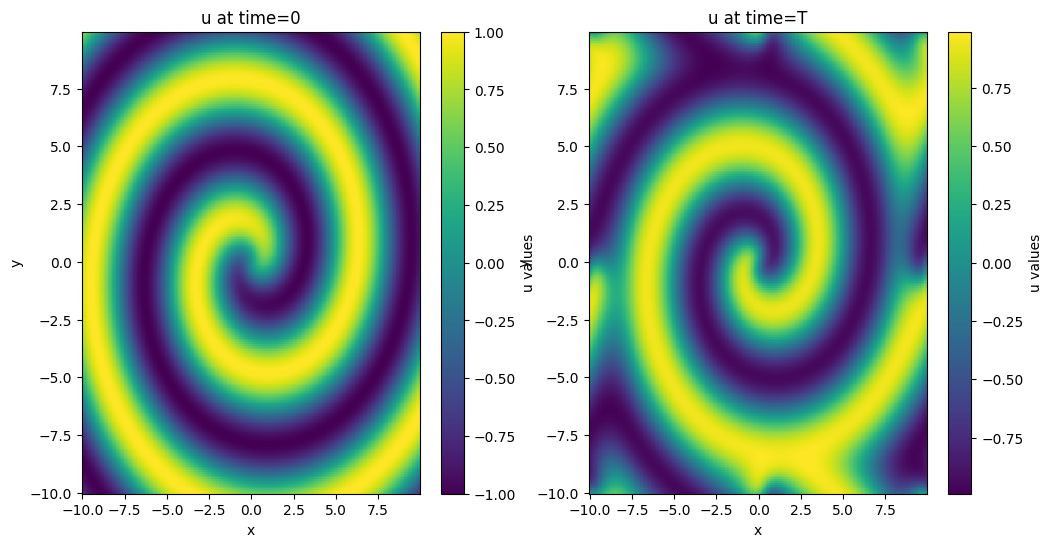

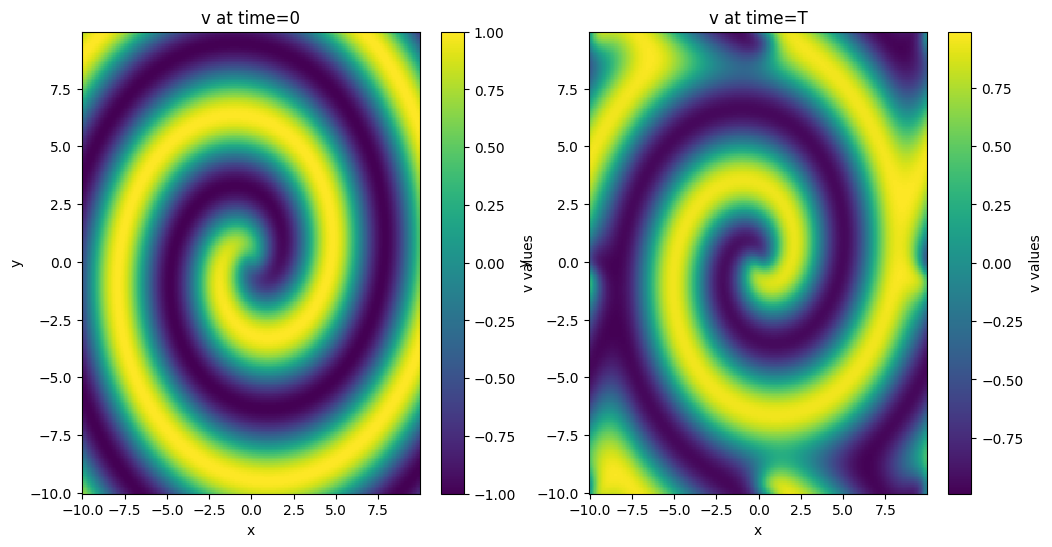

In [8]:
path_train = "PDEfind_data/3.npz"
data_npz = np.load(path_train)

# Load the data from the .npz file
u = torch.from_numpy(data_npz['u']).type(torch.float32)  # u field
v = torch.from_numpy(data_npz['v']).type(torch.float32)  # v ield
x = torch.from_numpy(data_npz['x']).type(torch.float32)  # Spatial variable
y = torch.from_numpy(data_npz['y']).type(torch.float32)  # Spatial variable
t = torch.from_numpy(data_npz['t']).type(torch.float32)  # Temporal variable

X, Y = x[:, 0, 0], y[0, :, 0]
X, Y = np.meshgrid(X,Y)

# Create a figure for visualization
plt.figure(figsize=(12, 6))

# Plot the first slice
plt.subplot(1, 2, 1)
plt.pcolormesh(X, Y, u[:,:,0], cmap='viridis', shading='auto')
plt.colorbar(label='u values')
plt.title('u at time=0')
plt.xlabel('x')
plt.ylabel('y')

# Plot the last slice
plt.subplot(1, 2, 2)
plt.pcolormesh(X, Y, u[:,:,-1], cmap='viridis', shading='auto')
plt.colorbar(label='u values')
plt.title('u at time=T')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(12, 6))

# Plot the first slice
plt.subplot(1, 2, 1)
plt.pcolormesh(X, Y, v[:,:,0], cmap='viridis', shading='auto')
plt.colorbar(label='v values')
plt.title('v at time=0')
plt.xlabel('x')
plt.ylabel('y')

# Plot the last slice
plt.subplot(1, 2, 2)
plt.pcolormesh(X, Y, v[:,:,-1], cmap='viridis', shading='auto')
plt.colorbar(label='v values')
plt.title('v at time=T')
plt.xlabel('x')
plt.ylabel('y')
plt.show()